# Laboratorium 9

### 0. Wczytanie danych
Używając metody `load_svmlight_file` z modułu `sklearn` załaduj plik `lab13_files/breast_cancer`, który składa się z 2 elementów: macierzy `X` o wymiarach `683 x 10` oraz wektora `y` o dlugosci `683`. Macierz `X` opisuje badania 683 pacjentow, a wektor `y` ich diagnozy. 

In [4]:
from sklearn.datasets import load_svmlight_file
import numpy as np
X, y = load_svmlight_file('lab13_files/breast-cancer')
X = X.toarray()

### 1. Preprocessing
1.1 Korzystajac z `numpy.where` przenumeruj wektor y, tzn zamień wartości 2 i 4 na -1 i +1. 

1.2 Przeskaluj macierz X, tak żeby wartości w każdej kolumnie mieściły się w zakresie [0,1], innymi słowy przeskaluj niezależnie każdą kolumne $X_j$ wg wzoru:


$$
X_j = \frac{X_j-\min(X_j)}{\max(X_j)-\min(X_j)}
$$

In [5]:
y = np.where(y == 2, -1, 1)
y

array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,
       -1,  1, -1,  1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1, -1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1, -1,
       -1,  1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1, -1,  1, -1,  1,  1,  1, -1, -1, -1,  1, -1, -1, -1,
       -1,  1,  1,  1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1, -1, -1,  1, -1,
       -1,  1,  1, -1, -1, -1, -1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,
       -1,  1, -1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1,  1, -1, -1, -1,
        1,  1, -1,  1,  1,  1, -1, -1,  1, -1, -1,  1,  1,  1,  1, -1,  1,
        1, -1,  1,  1,  1

In [6]:
X=(X-np.min(X, axis=0, keepdims=True))/(np.max(X, axis=0, keepdims=True)-np.min(X, axis=0,keepdims=True))

In [7]:
X.shape

(683, 10)

### 2. Wizualizacja
Narysuj dane używajac biblioteki `matplotlib`. Użyj wymiarów 1 i 2 z macierzy X, a jako kolory użyj wektora y. Pobaw sie parametrami "s" oraz "alpha" metody `plt.scatter` żeby uzyskać czytelną wizualizacje, np. taką jak poniżej.

<img src="lab13_files/d.png">

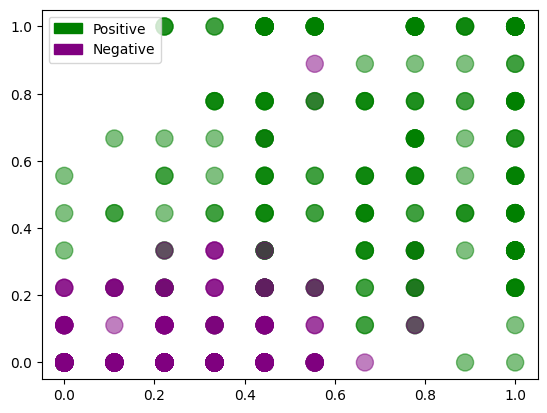

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

x_dim1 = X[:, 1]
x_dim2 = X[:, 2]
colors = np.where(y == 1, 'green', 'purple')
plt.scatter(x_dim1, x_dim2, c=colors, s = 150 , alpha=0.5)

green_patch = mpatches.Patch(color='green', label='Positive')
purple_patch = mpatches.Patch(color='purple', label='Negative')
plt.legend(handles=[green_patch, purple_patch])


plt.show()


### 3. Regresja 

Przeprowadź regresje liniową wg wzoru:
$$
\beta = (X^TX)^{-1}X^Ty
$$

In [53]:
X_Transposed=X.T
W=np.linalg.inv(X_Transposed@X)@X_Transposed@y

array([-0.70697451,  0.38471454, -0.57953311,  0.89557788, -0.67250453,
        1.34213317,  0.22141611, -0.6096382 , -0.51920739, -0.55920702,
       -0.57847392, -0.63014819, -0.0788399 , -0.45897371,  0.78459611,
       -0.3703507 , -0.67689863, -0.71287414,  0.86906318, -0.75356641,
        0.39641477,  0.45360535, -0.661026  , -0.65762986,  0.33324249,
       -0.49001179, -0.70657234, -0.64648443, -0.49944229, -0.60194037,
       -0.68411749,  0.15217662, -0.67398665, -0.62391759, -0.65268   ,
        0.61949938, -0.73528893,  0.86230921,  0.23679183, -0.18894761,
        1.09818868, -0.49978913,  0.48086132, -0.62683898,  1.21555589,
       -0.64626685, -0.71903504,  1.17919895,  0.22084337,  0.02860749,
        0.37411034,  0.15209273, -0.05573725,  0.45205061,  1.41430777,
       -0.63236481, -0.04259914, -0.18584166,  0.25110822, -0.55610441,
        0.79914628, -0.10848918, -0.65183973, -0.22745361, -0.74805046,
        0.437938  ,  0.74482267, -0.63707961, -0.64189544,  0.28

### 4. Wizualizacja Regresji

Zwizualizuj dane po zrzutowaniu na $\beta$ używajac metody `plt.hist`, tzn. narysuj histogramy $\beta X_+$ oraz
$\beta X_-$ gdzie $X_+$ to wiersze $X$ dla których $y=+1$ i analogicznie $X_-$. Postaraj się wygenerować czytelny wykres podobny do tego poniżej.

<img src="lab13_files/lr1.png">

In [81]:
Y_pos = X[y == 1]@W
Y_neg = X[y ==-1]@W

(array([[ 0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  2.,
          2.,  2.,  4.,  5.,  1.,  2.,  3.,  8.,  2.,  9.,  6., 11., 13.,
          4.,  6.,  7.,  8.,  8., 10., 15., 13., 14., 10.,  3., 11.,  8.,
          9.,  3.,  2.,  6.,  5.,  4.,  5.,  1.,  4.,  3.,  1.,  1.,  1.,
          1.,  0.,  1.,  0.,  1.],
        [ 0.,  1., 14., 42., 76., 71., 43., 38., 29., 31., 22., 21., 22.,
          7.,  5.,  3.,  0.,  2.,  4.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,
          0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
          0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.]]),
 array([-1.        , -0.94385965, -0.8877193 , -0.83157895, -0.7754386 ,
        -0.71929825, -0.66315789, -0.60701754, -0.55087719, -0.49473684,
        -0.43859649, -0.38245614, -0.32631579, -0.27017544, -0.21403509,
        -0.15789474, -0.10175439, -0.04561404,  0.01052632,  0.06666667,
         0.12280702,  0.17894737,  0.2350877

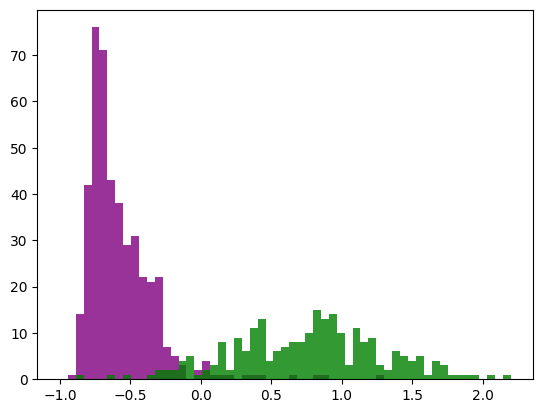

In [125]:
plt.hist([Y_pos, Y_neg], bins=np.linspace(-1, 2.2, 58), alpha=0.8,histtype='stepfilled',color=['Green','Purple'])

### 5. Klasyfikacja

Przeprowadź "klasyfikacje" naszych pacjentów, ci, którzy zostali zrzutowani na wartość ujemną dostają etykiete $-1$, a ci którzy na wartość dodatnia - etykiete $+1$

In [126]:
y_pred=np.where(X@W >= 0,1,-1)

### 6. Ewaluacja

Policz jak dokładny jest ten model, tzn. jak duży jest zbiór
$ \{ (x_i,y_i) : \mathrm{sign}(\beta x_i) = y_i \} $
w stosunku do rozmiaru całego $y$

Powinno udać się uzyskać wynik na poziomie 93-94%

In [131]:
acc=np.sum(y_pred==y)/y.shape[0]
acc

0.9487554904831625

### 7. Regularyzacja 
Dodaj parametr `C` do regresji liniowej
$$
\beta = (X^TX + \tfrac{1}{C}I)^{-1}X^Ty
$$

gdzie $I$ - macierz identyczności. 

Dla jakiej wartości `C` wynik jest najlepszy? Jaki wynik udało Ci sie uzyskać?

In [153]:
X_Transposed = X.T
C = [1e-9, 1e-6, 1e-4, 1e-3, 1e-2, 1e-1,1,1e1,1e2,1e3,1e4,1e6,1e9]
for c in C:
    W = np.linalg.inv(X_Transposed@X+1/c*np.identity(X.shape[1]))@X_Transposed@y
    y_pred = np.where(X@W >= 0, 1, -1)
    acc = np.sum(y_pred == y)/y.shape[0]
    print(c,acc)

1e-09 0.3557833089311859
1e-06 0.3557833089311859
0.0001 0.3557833089311859
0.001 0.3601756954612006
0.01 0.8799414348462665
0.1 0.9355783308931186
1 0.9502196193265008
10.0 0.9487554904831625
100.0 0.9487554904831625
1000.0 0.9487554904831625
10000.0 0.9487554904831625
1000000.0 0.9487554904831625
1000000000.0 0.9487554904831625


### 8. Gratulacje
Właśnie stworzyłeś/-aś swój pierwszy klasyfikator (statystyczny model predykcji). 

Spróbuj zastosować go do innych danych.

### Zadanie dodatkowe

Zaimplementuj powyższą metode jako klase `LRClassifier` wyposażoną w następujące metody:

* konstruktor przyjmujący dwa parametry: 
    * `C` - stała z równania 
    * `scale` - zmienna boolowska (domyslnie `True`) która określa czy macierz `X` ma byc automatycznie znormalizowana (przeskalowana do `[0,1]`)
* `.fit(X, y)` która spowoduje obliczenie $\beta$, dla `X` - dowolnej macierzy, `y` - wektora etykiet skladajacego sie z dwóch unikalnych wartosci (mogą to byc np. 2 różne stringi)
* `.predict(X)`, która zwróci wektor zawierajacy na `i`tej pozycji etykiete "przewidzianą" przez nasz model (pamiętaj o skalowaniu jesli `scale==True`!)

Przykladowe użycie:

    clf = LRClassifier(C=100)
    Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
    yt = np.array(['x', 'x', 'y', 'y', 'y'])
    clf.fit(Xt, yt)
    X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
    print(clf.predict(X)) # ['x', 'x', 'y']

In [230]:
class LRClassifier:
    def __init__(self,C,scale=True):
        self.C=C
        self.scale=scale
        self.X=None
        self.y=None
        self.W=None
        self.values=None
        self.min=None
        self.max=None
    def fit(self,X,y):
        self.X=X
        self
        if self.scale:
            self.min = np.min(X, axis=0, keepdims=True)
            self.max = np.max(X, axis=0, keepdims=True)
            self.X = (X-self.min) / ((self.max- self.min)+1e-12)
        self.values = np.unique(y)
        if len(self.values)>2:
            exit(0)
        self.y = np.where(y == self.values[0], 1, -1)
        X_Transposed=self.X.T
        self.W = np.linalg.inv(X_Transposed@self.X+1/self.C*np.identity(self.X.shape[1]))@X_Transposed@self.y
    def predict(self,X):
        if self.scale:
            X = (X-self.min) / ((self.max - self.min)+1e-12)
        X_pred=X@self.W
        y_pred = np.where(X_pred >= 0, self.values[0], self.values[1])
        return y_pred

In [231]:
clf = LRClassifier(C=100,scale=False)
Xt = np.array([[1, 0], [1, 1], [1, 2], [1, 3], [1, 4]])
yt = np.array(['x', 'x', 'y', 'y', 'y'])
clf.fit(Xt, yt)
X = np.array([[1, -1], [1, 0.9], [1, 2.1]])
print(clf.predict(X))  # ['x', 'x', 'y']

[[1 0]
 [1 1]
 [1 2]
 [1 3]
 [1 4]]
[[ 1.  -1. ]
 [ 1.   0.9]
 [ 1.   2.1]]
[ 1.59026496  0.45517288 -0.26172738]
['x' 'x' 'y']
